<a href="https://colab.research.google.com/github/caue22/TCC_Ransonware/blob/main/Algoritmos_Colab/Usando_modelo_treinado_Decision_Tree_desbalanceado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

# Baixar arquivos públicos do Drive
!gdown "https://drive.google.com/uc?id=1-1ldWvkc3sqMg8frMTQMdAkm6S_7OpMu" -O decision_tree_model_desbalanceado.pkl
!gdown "https://drive.google.com/uc?id=1ZQS5VfqqWn58auqJdRN9JehsANN6SoTr" -O label_encoder_decision_tree_balanceado.pkl
!gdown "https://drive.google.com/uc?id=1-1mBdik7BDGuutKMMCLI7O-BzzrUJfoh" -O conjunto_teste_decision_tree_balanceado.csv


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Precision: 98.49%
Recall: 98.48%
F1-Score: 98.48%
AUC-ROC: 97.47%
Confusion Matrix:
[[253568   1627    147]
 [  1649  15251    198]
 [   190    511  10983]]


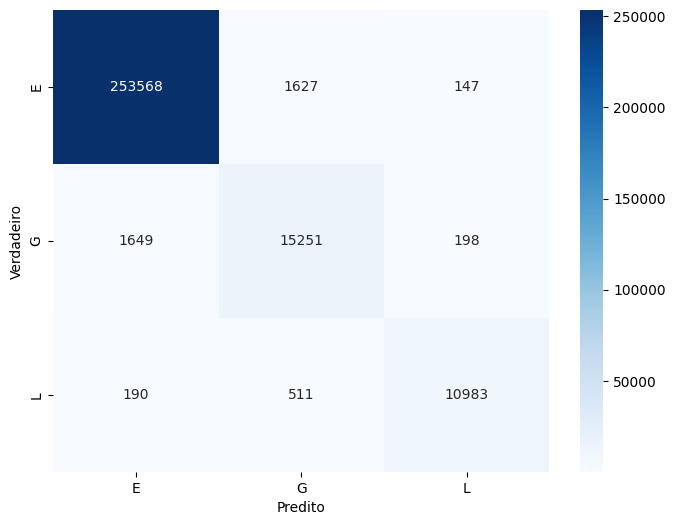

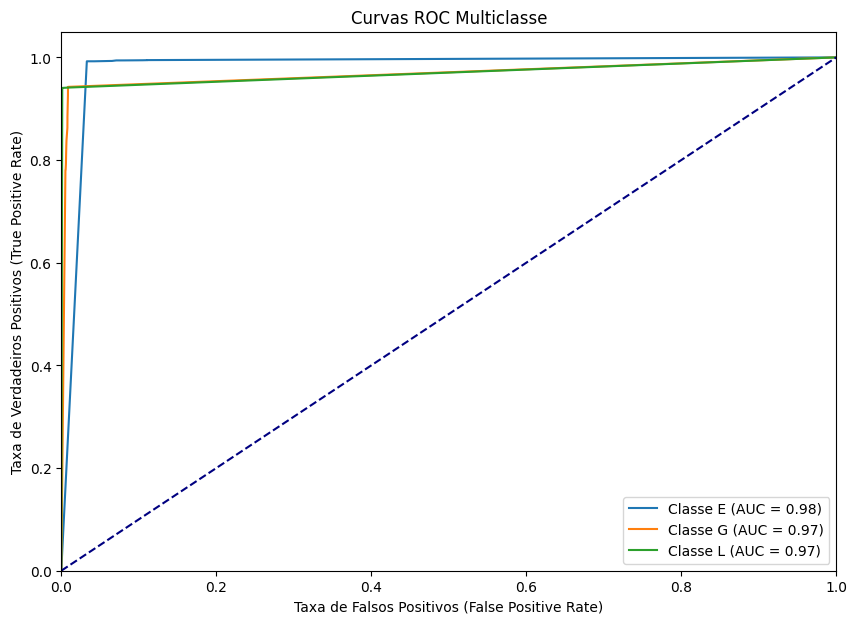

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para o modelo salvo e o conjunto de teste
model_path = '/content/drive/MyDrive/Modelos/decision_tree_model_desbalanceado.pkl'
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_decision_tree_desbalanceado.pkl'
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste_decision_tree_desbalanceado.csv'

# Carregar o modelo salvo
model_pipeline = joblib.load(model_path)

# Carregar o LabelEncoder salvo
label_encoder = joblib.load(label_encoder_path)

# Carregar o conjunto de teste salvo (sem a coluna 'true_label')
X_test_with_labels = pd.read_csv(csv_test_path)

# Separar a coluna 'true_label' e as características
y_test = label_encoder.transform(X_test_with_labels['true_label'])
X_test = X_test_with_labels.drop(columns=['true_label', 'index'])

# Fazer previsões com o modelo carregado
y_pred = model_pipeline.predict(X_test)

# Calcular métricas de avaliação
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC-ROC
y_pred_proba = model_pipeline.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

# Exibir os resultados
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Plotar a matriz confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

# Binarizar as classes para multiclasse
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Criar um dicionário para armazenar as curvas ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcular a curva ROC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar todas as curvas ROC
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Classe {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plotar a linha de sorte (classificação aleatória)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curvas ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()


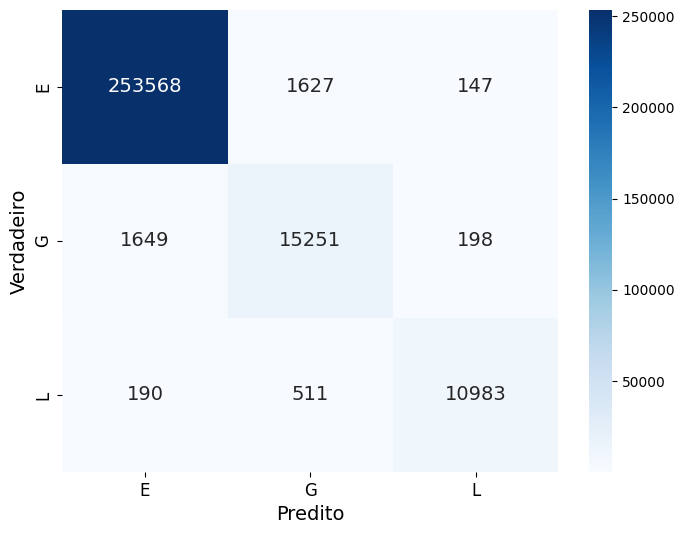

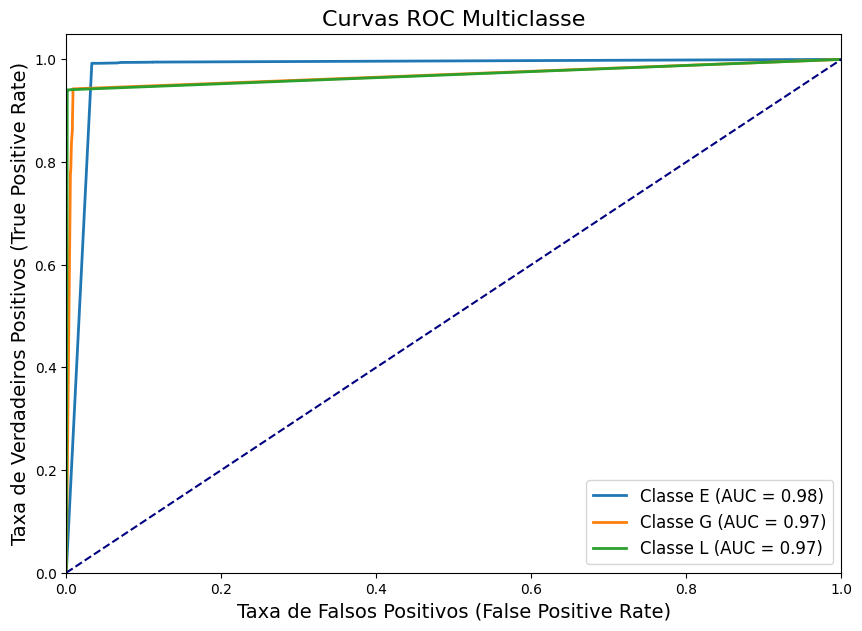

In [ ]:
# Plotar a matriz de confusão com rótulos maiores
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            annot_kws={"size": 14})  # Aumentar o tamanho dos números na matriz
plt.xlabel("Predito", fontsize=14)
plt.ylabel("Verdadeiro", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plotar todas as curvas ROC com rótulos maiores
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Classe {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})', linewidth=2)

# Plotar a linha de sorte (classificação aleatória)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)', fontsize=14)
plt.title('Curvas ROC Multiclasse', fontsize=16)
plt.legend(loc="lower right", fontsize=12)  # Aumentar o tamanho da legenda
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de amostras em X: 1420618
Número de amostras em y: 1420618
Label encoder salvo em: /content/drive/MyDrive/Modelos/label_encoder_knn.pkl
Modelo salvo em: /content/drive/MyDrive/Modelos/knn_model_desbalanceado.pkl
Conjunto de teste salvo como: /content/drive/MyDrive/Modelos/conjunto_teste_knn.csv
